In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
import pprint
from image_processing import ImageProcessor
from roi import CircularROI, RectangularROI, ROI

In [2]:
def read_file(fname):
    with h5py.File(fname) as f:
        images = f["images"][:]
    return images

In [3]:
def get_projections(img):
    x_projection = np.array(np.sum(img,axis=0))
    y_projection = np.array(np.sum(img,axis=1))
    return x_projection, y_projection

In [4]:
img_list= ['DYG14_1701969512.h5','DYG14_1701969514.h5','DYG14_1701969516.h5','DYG14_1701969518.h5',
           'DYG14_1701969528.h5','DYG14_1701969531.h5','DYG14_1701969533.h5','DYG14_1701969535.h5',
           'DYG14_1701969538.h5','DYG14_1701969541.h5','OTRS_LTUS_417_1692292260.h5','OTRS_IN20_621_1696886871.h5']
path = '/u/cd/cgarnier/beam_images/' + img_list[3]
print(img_list[3])
images = read_file(path)

DYG14_1701969518.h5


In [5]:
raw_image = images[0,:,:]

In [6]:
x_proj, y_proj = get_projections(raw_image)
x_mean = np.argmax(x_proj)
y_mean = np.argmax(y_proj)
print((x_mean,y_mean))
roi_c = np.array(raw_image.shape) / 2
roi_radius = np.min((roi_c * 2, np.array(raw_image.shape))) / 2

print(raw_image)
print(list(roi_c))

(317, 401)
[[0.0000e+00 8.0000e+01 1.3440e+02 ... 8.3200e+01 0.0000e+00 8.9600e+01]
 [0.0000e+00 1.6000e+01 5.1200e+01 ... 0.0000e+00 0.0000e+00 3.2000e+00]
 [1.3120e+02 0.0000e+00 6.7520e+02 ... 3.8976e+03 0.0000e+00 0.0000e+00]
 ...
 [1.2800e+02 2.5600e+01 9.2800e+01 ... 0.0000e+00 1.6000e+01 3.2000e+01]
 [2.2720e+02 0.0000e+00 6.4000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [3.2000e+00 0.0000e+00 7.3600e+01 ... 1.0240e+02 1.2160e+02 0.0000e+00]]
[350.0, 350.0]


In [7]:
print(raw_image.shape)

(700, 700)


In [8]:
# center= [x_mean,y_mean]
roi_rect_obj = RectangularROI(roi_type='Rectangular',center= [x_mean,y_mean],xwidth=150,ywidth = 150)
print(type(roi_rect_obj))

<class 'roi.RectangularROI'>


In [9]:
image_processor = ImageProcessor(roi = roi_rect_obj)

In [10]:
#print(image_processor.roi_type.xwidth)

In [11]:
print(image_processor.roi)

roi_type='Rectangular' center=[317.0, 401.0] xwidth=150 ywidth=150


[242, 326, 150, 150]
242  ->  392  ,  326  ->  476


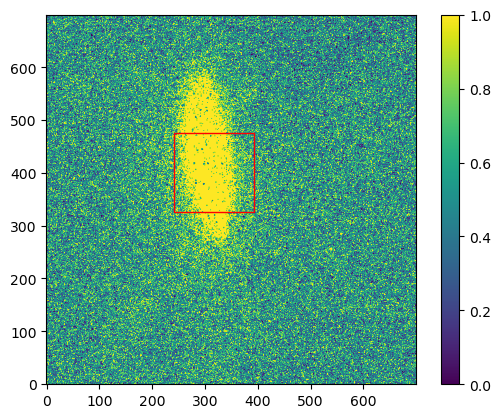

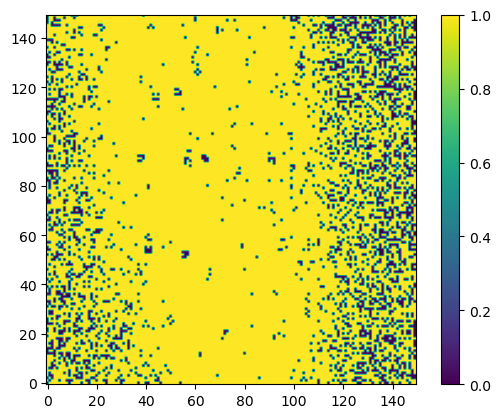

In [12]:
processed_image = image_processor.process(raw_image)
fig,ax = plt.subplots()
c = ax.imshow(processed_image>0,origin='lower')
fig.colorbar(c)


roi_type='Circular' center=[317.0, 401.0] radius=100.0
(200, 200)


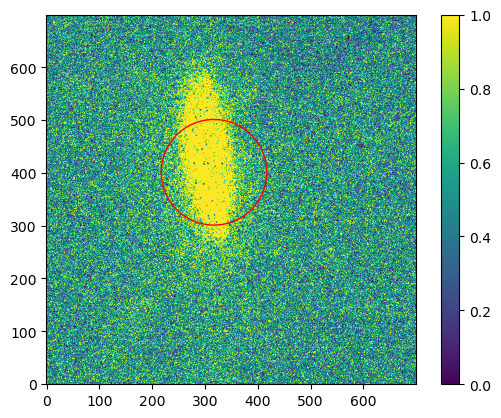

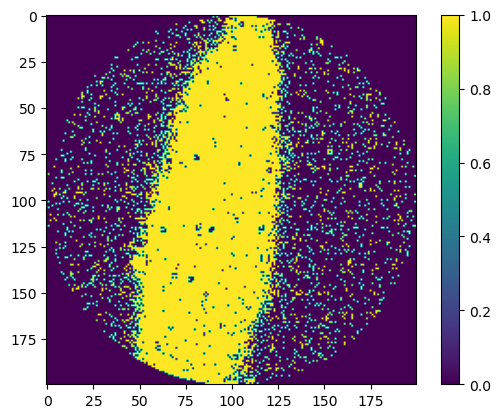

In [13]:
roi_circ_obj = CircularROI(roi_type = 'Circular', radius=100,center = [x_mean,y_mean])
image_processor2 = ImageProcessor(roi = roi_circ_obj, threshold = 250)
print(image_processor2.roi)
processed_image2 = image_processor2.process(raw_image)
print(processed_image2.shape)
fig,ax = plt.subplots()
c = ax.imshow(processed_image2>0)
fig.colorbar(c)